In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from odes import euler

# Métodos numéricos

<img src="figures/LogoCinvestav.png" style="height:100px" title="Cinvestav">

**CINVESTAV Unidad Saltillo**

**Curso Propedeutico del Programa de Maestría en Ciencias en Ingeniería Metalúrgica**

Dr. Edgar Ivan Castro Cedeño


Enero - Junio 2025

Contacto:
[edgar.castro@cinvestav.mx](mailto:edgar.castro@cinvestav.mx)

## 5.3 Ecuaciones de orden superior y sistemas de ecuaciones diferenciales

### 5.3.1 Sistemas de ecuaciones diferenciales

Muchos problemas prácticos en aplicaciones de ingeniería y científicas requieren la solución de sistemas de ecuaciones diferenciales simultaneas. Estos se pueden representar como:

$$\frac{dy_1}{dx} = f_1(x, y_1, y_2, \cdots, y_n)$$
$$\frac{dy_2}{dx} = f_2(x, y_1, y_2, \cdots, y_n)$$
$$\vdots$$
$$\frac{dy_n}{dx} = f_n(x, y_1, y_2, \cdots, y_n)$$

Para resolver estos sistemas de ecuaciones, se requiere conocer $n$ condiciones iniciales en el valor inicial $x_0$.

#### 5.3.1.1 Ejemplo (ecuaciones genéricas)

**Problema**:

Resuelva el siguiente sistema de ecuaciones diferenciales:

$$\frac{dy_1}{dx} = -0.5 y_1$$
$$\frac{dy_2}{dx} = 4 - 0.3y_2 - 0.1 y_1$$

Con las siguientes condiciones iniciales:

$$x_0=0, \quad y_1=4, \quad y_2=6$$

Integre en el intervalo $x=[0, 2]$ con un tamaño de paso de $0.5$.

In [2]:
def fun(x, y):
    dydx = [-0.5*y[0],
            4-0.3*y[1]-0.1*y[0]]
    return dydx

In [3]:
x0, xf = 0, 2
dx = 0.5
y0 = [4, 6]

t_span = (x0, xf)
t_eval = np.arange(x0, xf+dx, dx)

sol = solve_ivp(fun, t_span=t_span, y0=y0, t_eval=t_eval)
x = sol.t
y1, y2 = sol.y[0], sol.y[1]

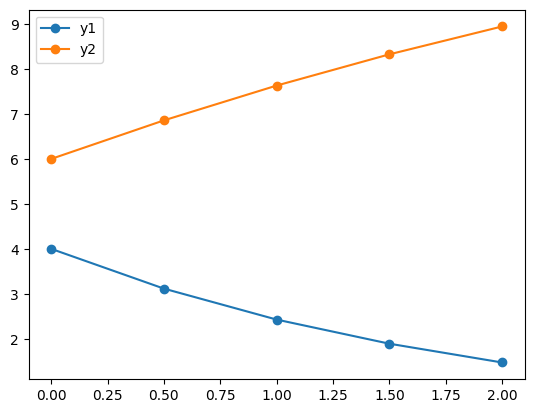

In [4]:
fig, ax = plt.subplots()
ax.plot(x, y1, ls='-', marker='o', label='y1')
ax.plot(x, y2, ls='-', marker='o', label='y2')
ax.legend()
plt.show()

#### 5.3.1.1 Ejemplo (reacción química)

**Problema**: Se desea conocer el tiempo que toma llevar a cabo una reacción química

$$\mathrm{A + B = C}$$

conociendo la cinética de reacción:

$$\frac{dA}{dt} = -k A B$$
$$\frac{dB}{dt} = -k A B$$
$$\frac{dC}{dt} = k A B$$

$$k=0.1$$


Con las siguientes condiciones iniciales:

$$t_0=0, \quad A(t_0)=2, \quad B(t_0)=1, \quad C(t_0)=0$$

Integre en el intervalo $t=[0, 50]$ con un tamaño de paso de $0.5$.

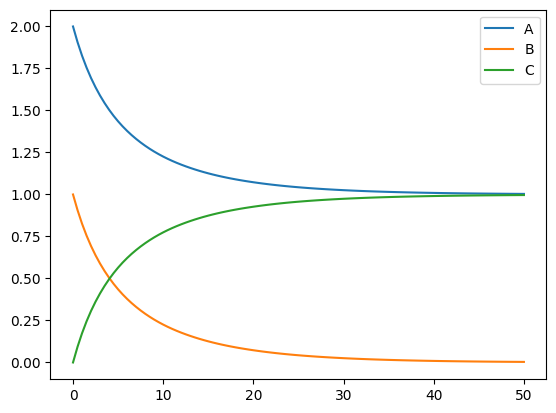

In [5]:
def fun(x, y):
    k = 0.1
    A, B, C = y[0], y[1], y[2]
    dA_dt, dB_dt, dC_dt = -k*A*B, -k*A*B, k*A*B
    dydt = np.array([dA_dt, dB_dt, dC_dt])
    return dydt

t0, tf = 0, 50
dt = 0.5
y0 = [2, 1, 0]

t_span = (t0, tf)
t_eval = np.arange(t0, tf+dt, dt)

sol = solve_ivp(fun, t_span=t_span, y0=y0, t_eval=t_eval)
t = sol.t
A, B, C = sol.y[0], sol.y[1], sol.y[2]
fig, ax = plt.subplots()
ax.plot(t, A, ls='-', marker='', label='A')
ax.plot(t, B, ls='-', marker='', label='B')
ax.plot(t, C, ls='-', marker='', label='C')
ax.legend()
plt.show()

### 5.3.2 Ecuaciones diferenciales ordinarias de orden superior

Una ecuación diferencial ordinaria de orden superior se puede representar en su forma explícita general como:

$$F\left(x, y, y^{\prime}, y^{\prime\prime}, \cdots, y^{(n)}\right) = 0$$

$$y^{(n)} = f\left(x, y, y^{\prime}, y^{\prime\prime}, \cdots, y^{(n-1)}\right)$$

donde $x$ es la variable independiente, $y(x)$ es la variable dependiente, $y^{(j)} = \frac{d^j y}{dx^j}$, para $j=1,\cdots,n$, son las derivadas sucesivas de $y(x)$ con respecto a $x$.

Este sistema se puede reescribir como un sistema de $n$ ecuaciones diferenciales de primer orden al definir una nueva familia de funciones desconocidas de la forma:

$$y_i = y^{i}$$

Entonces, para un sistema $n$ ecuaciones, el sistema se escribe como:

$$\begin{matrix*}[l]
y_0 & \equiv & y  \\
y_1 & = & y_0^{\prime} & = & f\left(x, y\right)\\
y_2 & = & y_1^{\prime} & = & f\left(x, y, y^{\prime} \right)\\
y_3 & = & y_2^{\prime} & = & f\left(x, y, y^{\prime}, y^{\prime\prime} \right)\\
& \vdots & \\
y_{n-1} & = & y_{n-2}^{\prime} & = & f\left(x, y, y^{\prime}, y^{\prime\prime}, \cdots, y^{n-2}\right) \\
y_n & = & y_{n-1}^{\prime} & = & f\left(x, y, y^{\prime}, y^{\prime\prime}, \cdots, y^{n-2}, y^{n-1}\right) \\
\end{matrix*}$$

Para resolver el sistema de ecuaciones resultantes, se requiere conocer $n$ condiciones iniciales en el valor inicial $x_0$.

#### 5.3.2.1 Ejemplo (oscilador)

Se tiene una ecuación diferencial ordinaria de orden 2:

$$\frac{d^2y}{dt^2} + \frac{dy}{dt} + 5y = 0$$

Condiciones iniciales:

$$y(0) = 3, \quad y^{\prime}(0) = 0$$

Efectuando una reducción de la ecuación diferencial ordinaria de orden superior en un sistema de ecuaciones de orden 1 se tiene:

$$\begin{matrix} y_0 & = & y \\ y_1 & = & y_0^{\prime} & = & \frac{dy}{dt} \\ y_2 & = & y_1^{\prime} & = & \frac{d^2y}{dt^2} \\ \end{matrix}$$

La ecuación diferencial se puede reescribir, tras cambiar las variables, como: 

$$y_2 + y_1 + 5 y_0 = 0$$

$$y_2 = - y_1 -5y_0 $$

El sistema de ecuaciones se puede escribir entonces, para encontrar su solución mediante un método numérico, como:

$$y_{0, i+1} = y_{0,i} + \phi(x_i,y_{0,i},h)h$$

$$y_{1, i+1} = y_{1,i} + \phi(x_i,y_{1,i},h)h$$

$$y_{2, i+1} = -y_{1,i+1} - 5 y_{0,i+1}$$

donde $\phi(x_i, y_{j,i}, h)$ es la función de incremento, que puede representar un método de integración explícito tal como el método de Euler o el método Runge-Kutta.

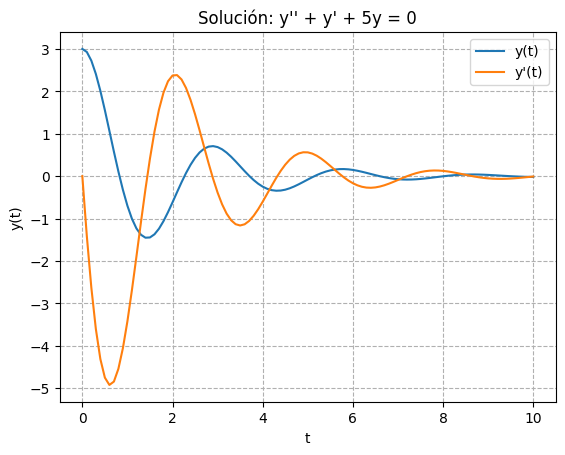

In [6]:
# escritura de sistema de ecuaciones diferenciales
def odefun(t, y):
    dydt = [y[1], -y[1]-5*y[0]]
    return dydt

# entradas para resolvedor
y0 = [3, 0]
t_span = (0, 10)
dt = 0.1
t_eval = np.arange(t_span[0], t_span[1]+dt, dt)

# resolución de ecuación diferencial
sol = solve_ivp(odefun, t_span, y0=y0, t_eval=t_eval)

# visualización de la solución
fig, ax = plt.subplots()
ax.plot(sol.t, sol.y[0], label="y(t)")
ax.plot(sol.t, sol.y[1], label="y'(t)")
ax.set(xlabel='t', ylabel='y(t)')
ax.set_title("Solución: y'' + y' + 5y = 0")
ax.legend()
ax.grid(ls='--')
plt.show()

#### 5.3.2.1 Ejemplo (movimiento rectilineo con aceleración variable)

$$\frac{d^2y}{dt^2} = \sin(t) + \cos(t)$$

$$ y_0 = y$$
$$ y_1 = \frac{dy}{dt}$$
$$ y_2 = \frac{d^2y}{dt}$$

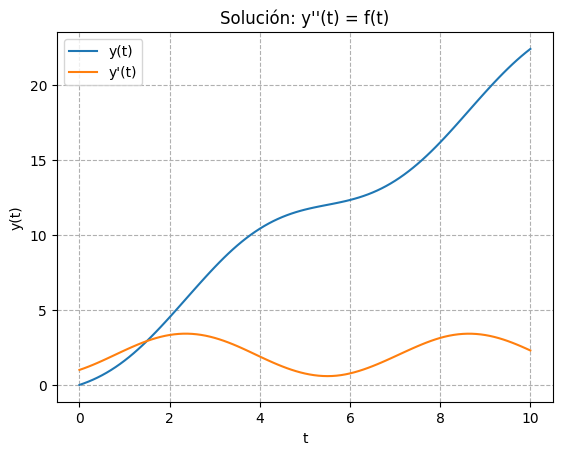

In [7]:
# escritura de sistema de ecuaciones diferenciales
def odefun(t, y):
    dydt = [y[1], np.sin(t) + np.cos(t)]
    return dydt

# entradas para resolvedor
y0 = [0, 1]
t_span = (0, 10)
dt = 0.1
t_eval = np.arange(t_span[0], t_span[1]+dt, dt)

# resolución de ecuación diferencial
sol = solve_ivp(odefun, t_span, y0=y0, t_eval=t_eval)

# visualización de la solución
fig, ax = plt.subplots()
ax.plot(sol.t, sol.y[0], label="y(t)")
ax.plot(sol.t, sol.y[1], label="y'(t)")
ax.set(xlabel='t', ylabel='y(t)')
ax.set_title("Solución: y''(t) = f(t)")
ax.legend()
ax.grid(ls='--')
plt.show()